<a href="https://colab.research.google.com/github/y2om/API/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4%EC%99%80_API_10%EC%A3%BC%EC%B0%A8(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


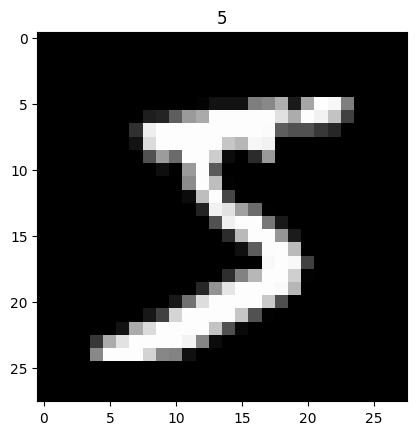

훈련용 데이터의 형태:  (60000, 784) 테스트용 데이터의 형태 :  (10000, 784)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train,t_train),(x_test,t_test)=mnist.load_data()
#MNIST 읽어들이기
print(x_train.shape,x_test.shape)   #28X28의 손으로 쓴 문자

#각 픽셀의 값을 0-1 범위에 넣는다
x_train=x_train/255
x_test=x_test/255

#손으로 쓴 문자 이미지를 1개 표시
plt.imshow(x_train[0].reshape(28,28),cmap="gray")
plt.title(t_train[0])
plt.show()

#1차원으로 변환한다 
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)
print("훈련용 데이터의 형태: ",x_train.shape,"테스트용 데이터의 형태 : ",x_test.shape)

In [10]:
epochs=20
batch_size=128
n_in_out=784  #입출력층의 뉴런 수
n_mid=64  #중간층의 뉴런 수

In [11]:
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input,Dense

#각 층
x=Input(shape=(n_in_out,))
encoder=Dense(n_mid,activation="relu")  #Encoder
decoder=Dense(n_in_out,activation="sigmoid")  #Decoder

#망
h=encoder(x)
y=decoder(h)

#오토인코더의 모델
model_autoencoder = Model(x,y)
model_autoencoder.compile(optimizer="adam",loss="binary_crossentropy")
model_autoencoder.summary()
print()

#Encoder만의 모델
model_encoder= Model(x,h)
model_encoder.summary()
print()

#Decoder만의 모댈
input_decoder=Input(shape=(n_mid,))
model_decoder=Model(input_decoder,decoder(input_decoder))
model_decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
Total params: 50,240
Trainable para

In [12]:
model_autoencoder.fit(x_train,x_train,
                      shuffle=True,
                      epochs=epochs,
                      batch_size=batch_size,
                      validation_data=(x_test,x_test))

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.1975 - val_loss: 0.1312
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1156 - val_loss: 0.1018
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0954 - val_loss: 0.0882
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0854 - val_loss: 0.0814
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0804 - val_loss: 0.0780
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0778 - val_loss: 0.0762
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0763 - val_loss: 0.0751
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0754 - val_loss: 0.0744
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0749 - val_loss: 0.0740
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0744 - val_loss: 0.07

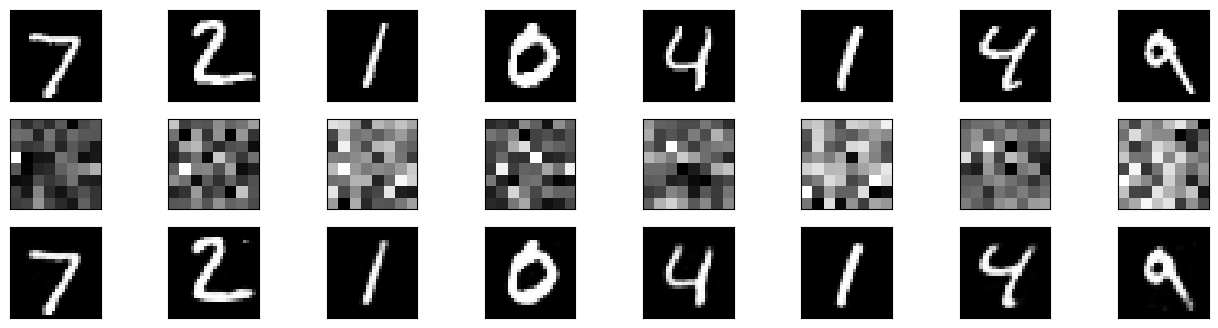

In [13]:
encoded = model_encoder.predict(x_test)
decoded= model_decoder.predict(encoded)

n=8   #표시할 이미지 수
plt.figure(figsize=(16,4))
for i in range(n):
  #입력이미지
  ax= plt.subplot(3,n,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap="Greys_r")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  #중간층의 출력
  ax=plt.subplot(3,n,i+1+n)
  plt.imshow(encoded[i].reshape(8,8),cmap="Greys_r")  #ㅇ미지 크니는 중간층의 누런 수에 맞춰서 변경한다
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #출력 이미지
  ax= plt.subplot(3,n,i+1+2*n)
  plt.imshow(decoded[i].reshape(28,28),cmap="Greys_r")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()